#5CSO37 Final Project


- **Name**: Prashant Sharma
- **Student ID**: 2417736
- **Module**: Concepts and Technologies of AI
- **Submission Date**: 2025-02-11

Dataset Name: Used Car Price Prediction Dataset
Source: Kaggle - Used Car Price Prediction Dataset
https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset

Attributes:

Brand
Model,
Year,
Mileage,
Engine Type
Transmission
Fuel Type
Color
Features (e.g., airbags, sensors)
Price (Target Variable) Target: Car Price

Sustainable Development Goals:

SDG 8: Economic Growth: Helps businesses and individuals make informed decisions about buying and selling cars.

SDG 12: Responsible Consumption: Encourages responsible buying and selling of used cars.

SDG 9: Industry and Innovation: Supports the car industry in analyzing market trends and improving processes.

This dataset helps predict used car prices based on different car features, which can be useful for buyers, sellers, and businesses.

### Objective:

This notebook focuses on understanding the dataset and creating both regression and classification models using supervised learning algorithms

#**Regression**

**Importing all essential libraries for data analysis.**

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif


In [197]:
#Importing drive module and mounting google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [198]:
#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

Dataset user car prediction was created by Nehal Birla, Nishant Verma and Nikhil Kushwaha which was updated a year ago. i got access into the dataset through kaggle.

In [199]:
#Loading dataset
car_df = pd.read_csv("/content/drive/MyDrive/AI Proposal/Used Car Price Prediction Dataset.csv")
car_df

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60
...,...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0,9.50
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0,4.00
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0,3.35
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0,11.50


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB

Summary Statistics:
              Year  Present_Price     Kms_Driven       Owner  Selling_Price
count   301.000000     301.000000     301.000000  301.000000     301.000000
mean   2013.627907       7.628472   36947.205980    0.043189       4.661296
std       2.891554       8.644115   38886.883882    0.247915       5.082812
min    200

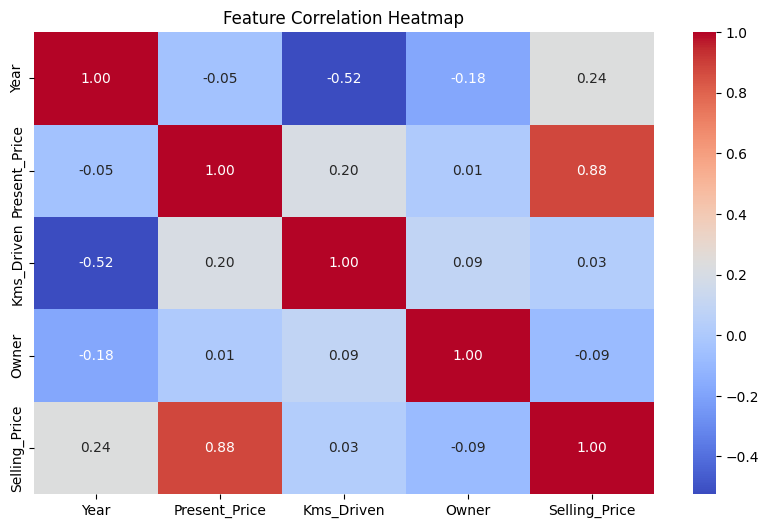

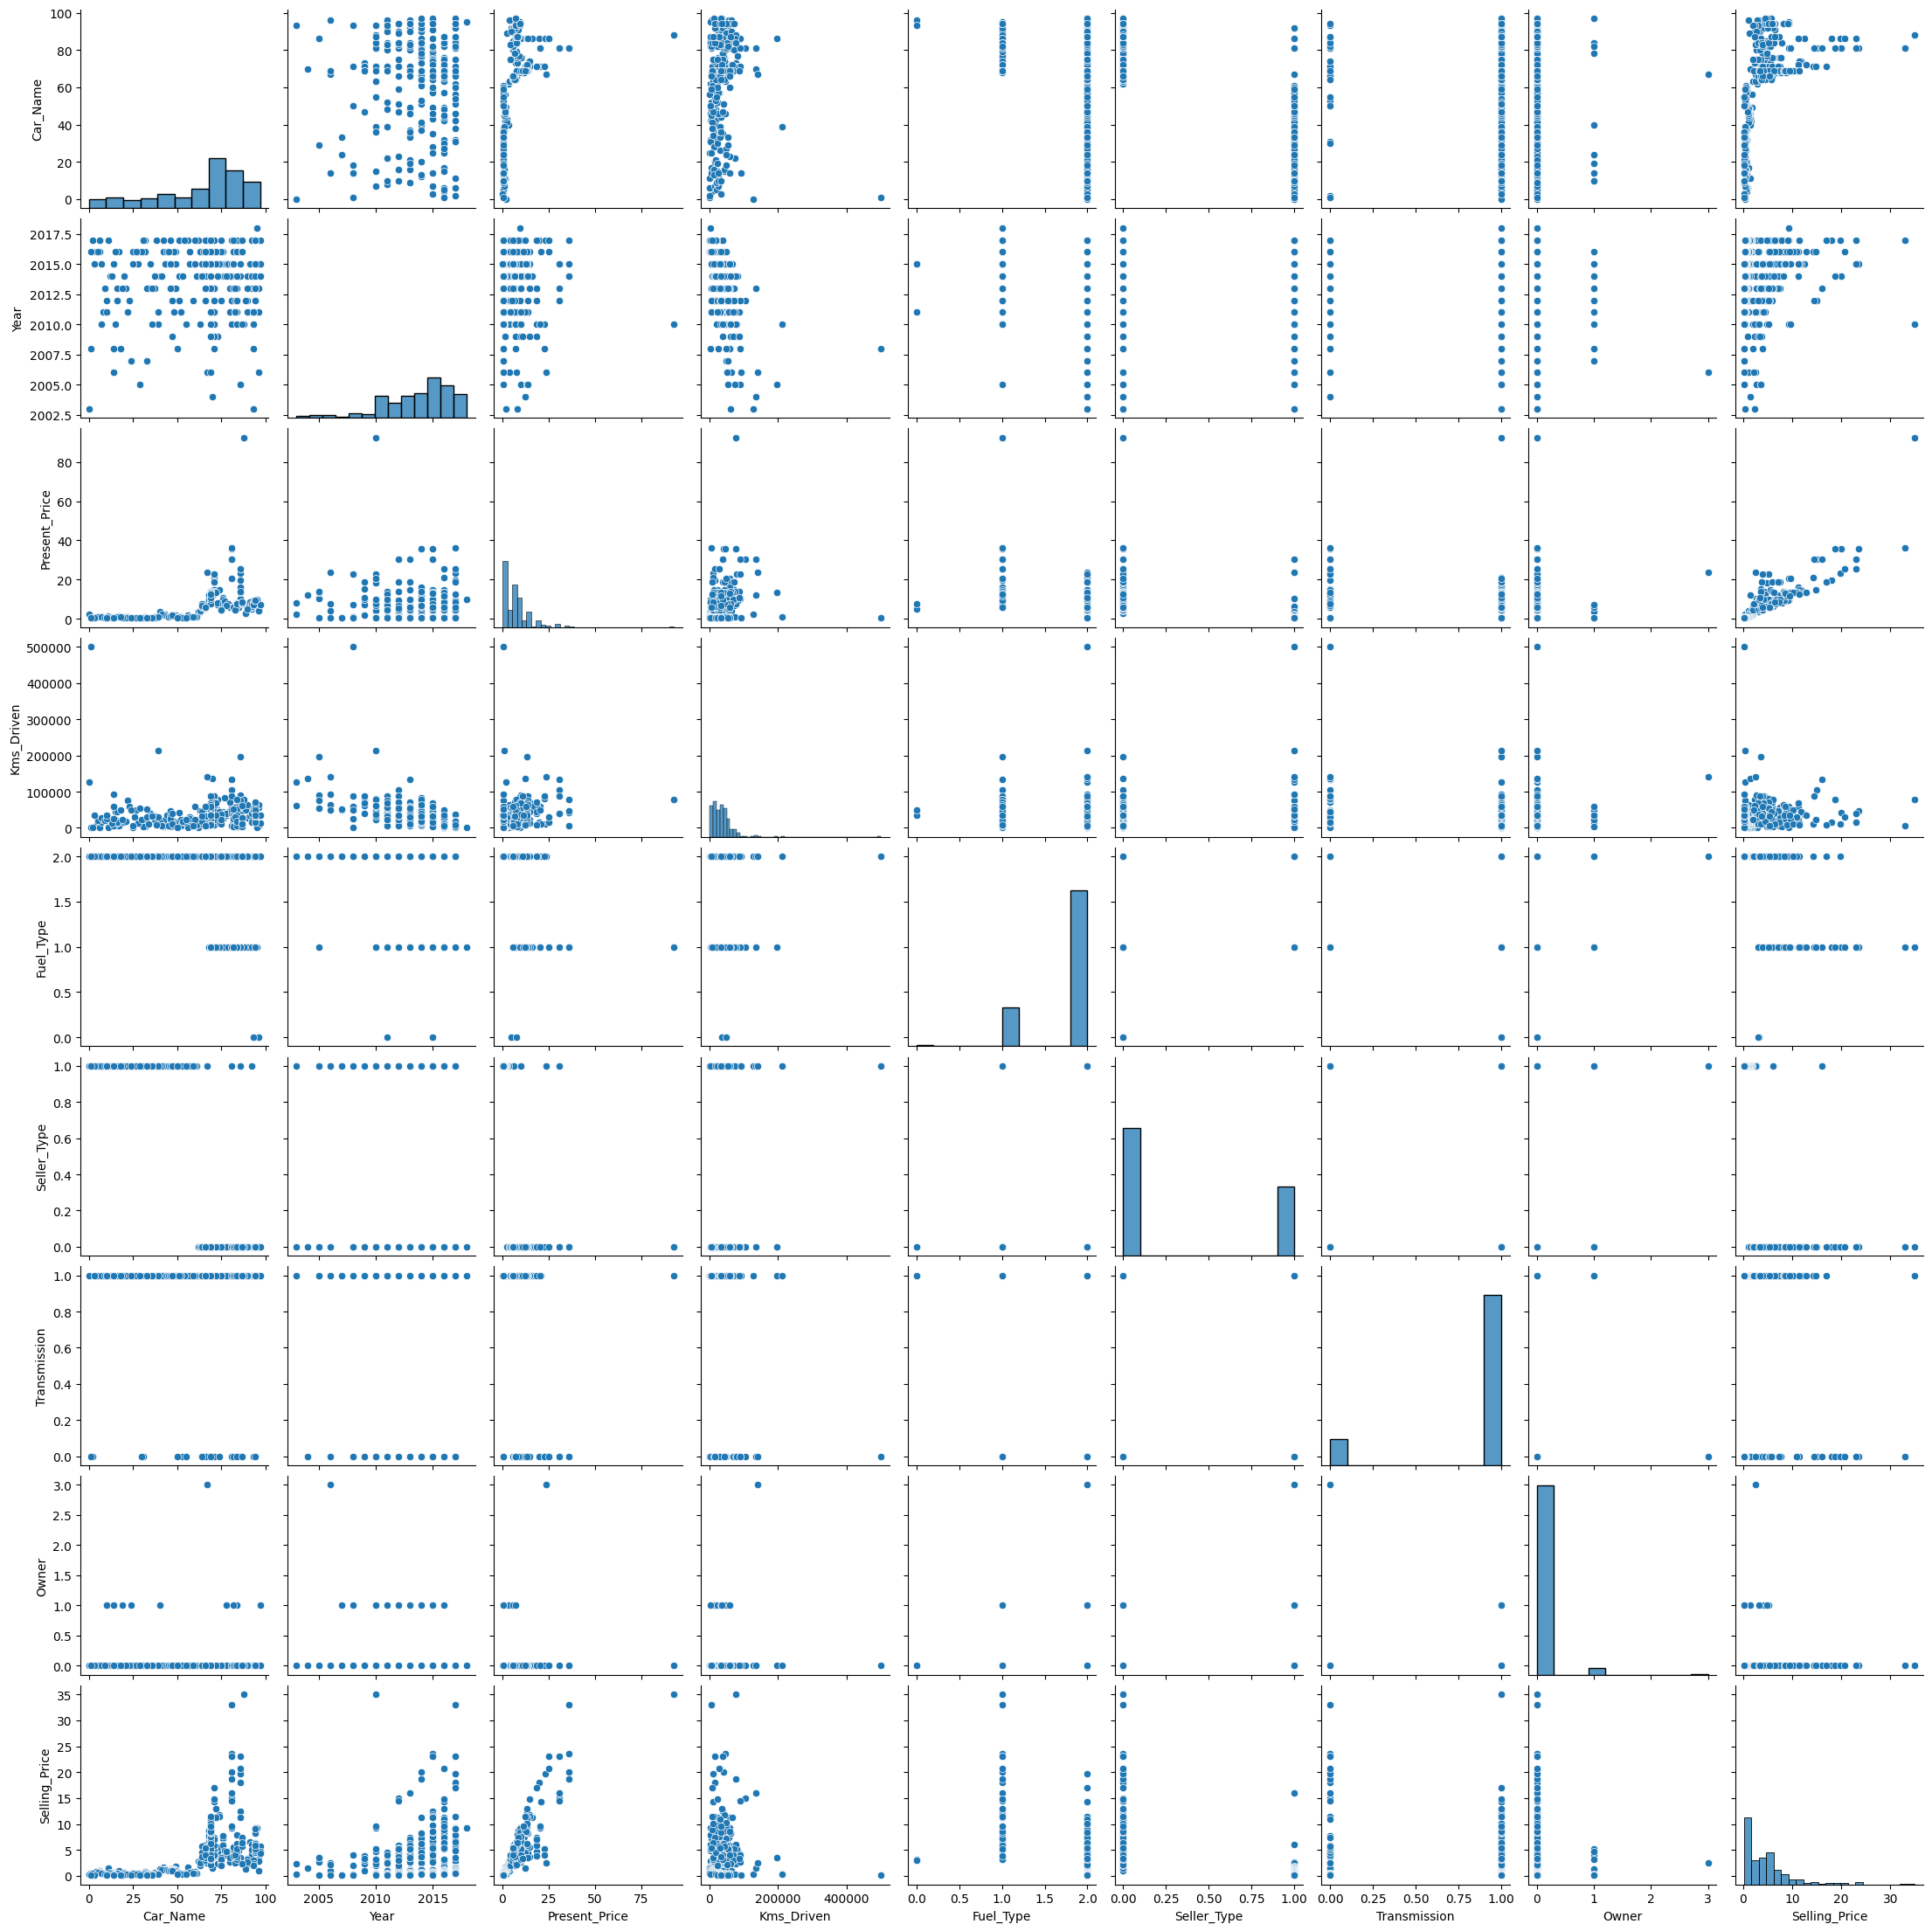

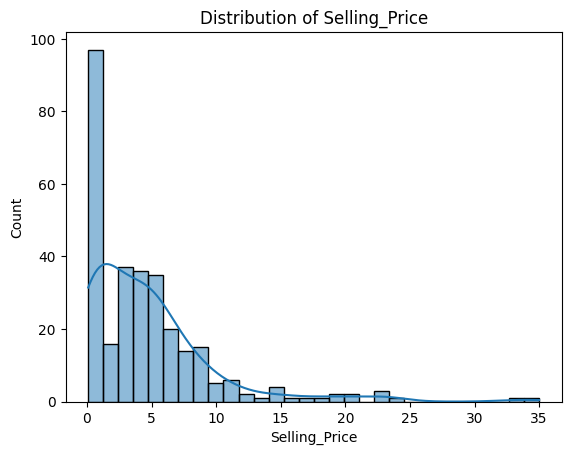

In [201]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AI Proposal/Used Car Price Prediction Dataset.csv")  # Replace with actual dataset path

# Basic information
print("Dataset Info:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Exclude non-numeric columns before correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Encode categorical columns for visualization (Optional)
df_encoded = df.copy()
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Pairplot for relationships (only numerical columns)
sns.pairplot(df_encoded)
plt.show()

#  Ensure "target_variable" exists before plotting
target_col = "Selling_Price"  # Change to your actual target column name
if target_col in df.columns:
    sns.histplot(df[target_col], kde=True, bins=30)
    plt.title(f"Distribution of {target_col}")
    plt.show()
else:
    print(f"Error: Target variable '{target_col}' not found in dataset!")


In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_df.shape

(301, 9)

In [ ]:
#Calculating sun of null values
car_df.isnull().sum()

,0
Car_Name,0
Year,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0
Selling_Price,0


In [ ]:
car_df.dtypes

,0
Car_Name,object
Year,int64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64
Selling_Price,float64


In [ ]:
#Calculating sum of duplicated values
car_df.duplicated().sum()

2

In [ ]:
#Dropping duplicates
car_df = car_df.drop_duplicates()
car_df.duplicated().sum()

0

In [ ]:
#Printing unique values of selected columns
for i in car_df:
    if i in ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission','Owner']:
        print(i, car_df[i].unique(), car_df[i].nunique(), end = "\n\n")

Year [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007] 16

Fuel_Type ['Petrol' 'Diesel' 'CNG'] 3

Seller_Type ['Dealer' 'Individual'] 2

Transmission ['Manual' 'Automatic'] 2

Owner [0 1 3] 3



In [ ]:
#Droppting column 'Car_Name' if it exists
if 'Car_Name' in car_df.columns:
    car_df = car_df.drop('Car_Name', axis=1)
else:
    print("Column 'Car_Name' not found in DataFrame")

car_df.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [ ]:
car_df.describe()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,7.541037,36916.752508,0.043478,4.589632
std,2.896868,8.567887,39015.170352,0.248720,4.984240
min,2003.000000,0.320000,500.000000,0.000000,0.100000
25%,2012.000000,1.200000,15000.000000,0.000000,0.850000
50%,2014.000000,6.100000,32000.000000,0.000000,3.510000
75%,2016.000000,9.840000,48883.500000,0.000000,6.000000
max,2018.000000,92.600000,500000.000000,3.000000,35.000000


**Univariate Analysis**

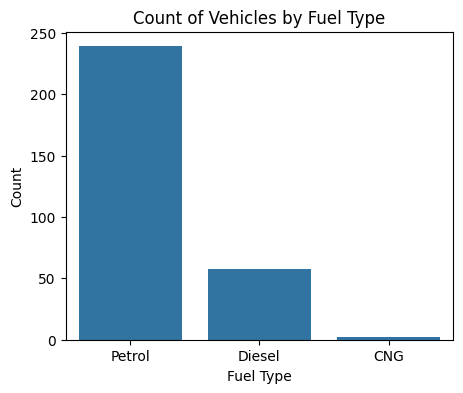

In [ ]:
#Countplot of cars by fuel type
plt.figure(figsize=(5,4))
sns.countplot(data=car_df, x='Fuel_Type')
plt.title('Count of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

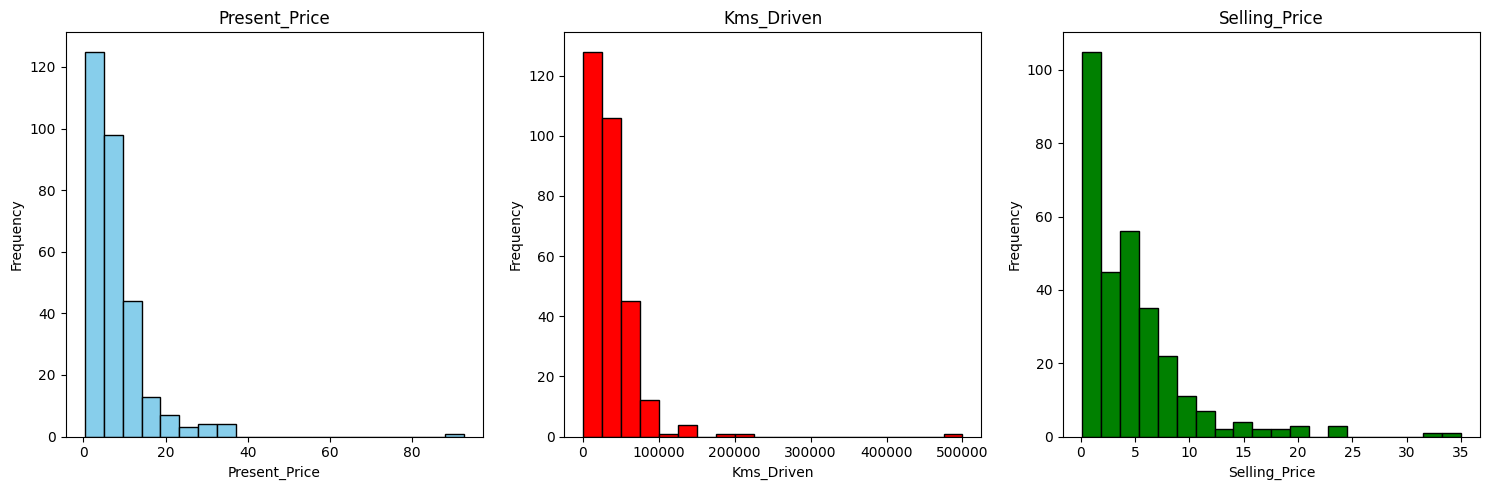

In [ ]:
plt.figure(figsize=(15,5))

#Histogram for Present_Price
plt.subplot(1,3,1)
plt.hist(car_df['Present_Price'], bins=20, color = 'skyblue', edgecolor='black')
plt.title('Present_Price')
plt.xlabel('Present_Price')
plt.ylabel("Frequency")

#Histogram for Kms_Driven
plt.subplot(1,3,2)
plt.hist(car_df['Kms_Driven'], bins=20, color = 'red', edgecolor='black')
plt.title('Kms_Driven')
plt.xlabel('Kms_Driven')
plt.ylabel("Frequency")

#Histogram for Selling_Price
plt.subplot(1,3,3)
plt.hist(car_df['Selling_Price'], bins=20, color = 'green', edgecolor='black')
plt.title('Selling_Price')
plt.xlabel('Selling_Price')
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Bivariate Analysis**

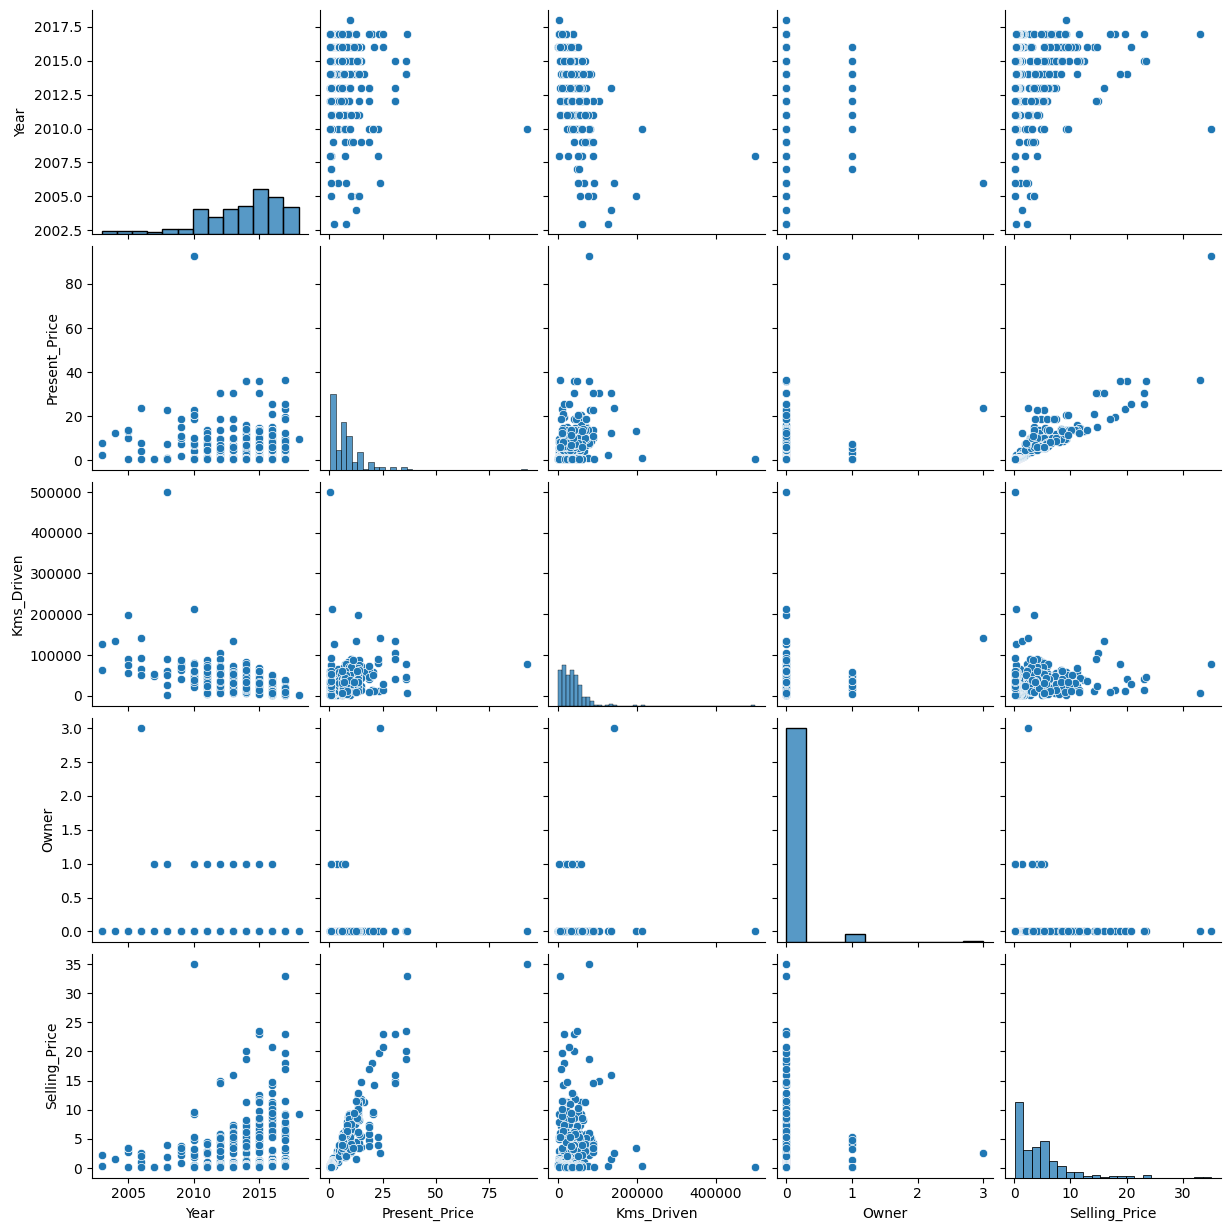

In [ ]:
#Pairplot of dataset car_df
sns.pairplot(car_df)
plt.show()

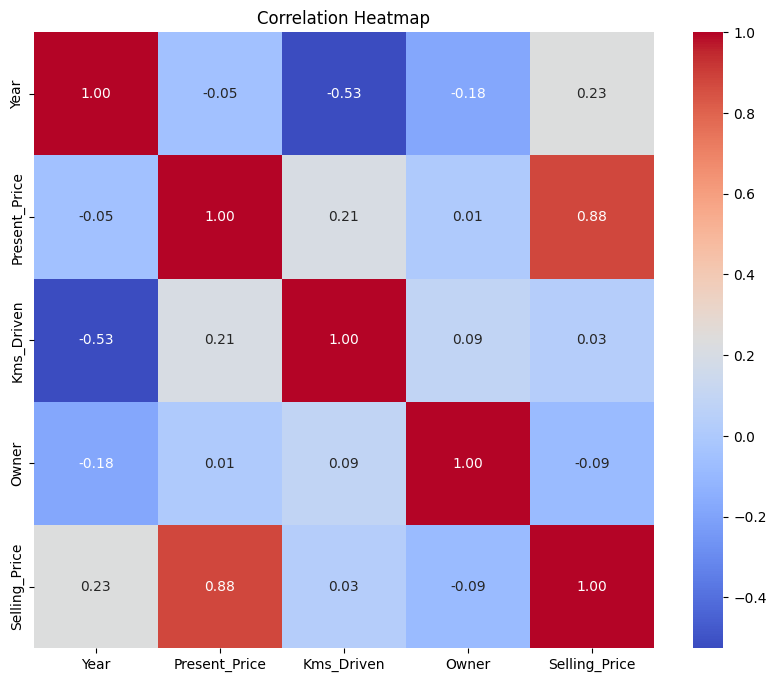

In [ ]:
#Heatmap
plt.figure(figsize=(10,8))
# Select only numerical features for correlation calculation
numerical_features = car_df.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**One Hot Encoding**

In [ ]:
#Importing library for one hot encoding
from sklearn.preprocessing import OneHotEncoder

categorical = ['Fuel_Type', 'Seller_Type', 'Transmission']
#Performs one hot encoding
car_df = pd.get_dummies(car_df, columns = categorical, drop_first = True)
car_df

,Year,Present_Price,Kms_Driven,Owner,Selling_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,3.35,False,True,False,True
1,2013,9.54,43000,0,4.75,True,False,False,True
2,2017,9.85,6900,0,7.25,False,True,False,True
3,2011,4.15,5200,0,2.85,False,True,False,True
4,2014,6.87,42450,0,4.60,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,9.50,True,False,False,True
297,2015,5.90,60000,0,4.00,False,True,False,True
298,2009,11.00,87934,0,3.35,False,True,False,True
299,2017,12.50,9000,0,11.50,True,False,False,True


#Building from scratch

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

# Split dataset into features (X) and target variable (y)
X = df.drop(columns=["Selling_Price"])
y = df["Selling_Price"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shape after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 8), (61, 8), (240,), (61,))

**Splitting Data**

In [ ]:
#Importing library for splitting data
from sklearn.model_selection import train_test_split

#Separating feature variable and target variable
X = car_df.drop(columns=['Selling_Price']) #Fearure variables
y = car_df['Selling_Price'] #Target Variable

#Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

**Building Models**

# Random forest regressor scratch

In [203]:
import numpy as np
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.base import BaseEstimator, RegressorMixin

class RandomForestRegressorScratch(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, max_features="sqrt"):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def bootstrap_sample(self, X, y):
        """Create a bootstrap sample from the original dataset"""
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth, min_samples_split=self.min_samples_split, max_features=self.max_features
            )
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        """Aggregate predictions from all decision trees"""
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_predictions, axis=0)

    def score(self, X, y):
        """Evaluate model performance using R-squared score"""
        predictions = self.predict(X)
        return 1 - (np.sum((y - predictions) ** 2) / np.sum((y - np.mean(y)) ** 2))

# Example Usage
if __name__ == "__main__":
    from sklearn.datasets import fetch_california_housing

    # Load sample dataset
    data = fetch_california_housing()
    X, y = data.data, data.target

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest Regressor from Scratch
    rf_scratch = RandomForestRegressorScratch(n_estimators=10, max_depth=5, min_samples_split=4)
    rf_scratch.fit(X_train, y_train)

    # Make predictions
    predictions = rf_scratch.predict(X_test)

    # Evaluate Performance
    print("MSE:", mean_squared_error(y_test, predictions))
    print("R-Squared:", rf_scratch.score(X_test, y_test))



MSE: 0.5162534423371881
R-Squared: 0.606036397102369


#calculating MSE

In [ ]:
#Importing libraries for Random Forest Regressor and evaluation metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Creating random forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train) #Fitting the model on training data

ypred_rf = rf_model.predict(X_test)#Predicting on test data

#Calculating MSE, MAE, R2 score
rf_mse = mean_squared_error(y_test, ypred_rf)
print(f"MSE: {rf_mse}")
rf_mae = mean_absolute_error(y_test, ypred_rf)
print(f"MAE: {rf_mae}")
rf_r2 = r2_score(y_test, ypred_rf)
print(f"R2: {rf_r2}")

MSE: 12.256879635833338
MAE: 1.4663883333333343
R2: 0.5244342943414741


In [ ]:
#Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

#Creating Gradient Boosting Regressor model
grd_model = GradientBoostingRegressor(random_state=42)
grd_model.fit(X_train, y_train) #Fitting model on training data

ypred_grd = grd_model.predict(X_test) #Predicting on test data

#Calculating MSE, MAE, R2 score
grd_mse = mean_squared_error(y_test, ypred_grd)
print(f"MSE: {grd_mse}")
grd_mae = mean_absolute_error(y_test, ypred_grd)
print(f"MAE: {grd_mae}")
grd_r2 = r2_score(y_test, ypred_grd)
print(f"R2: {grd_r2}")

MSE: 7.663264425484085
MAE: 1.209323821905244
R2: 0.7026661056947356


#Primary model

In [209]:
# Model 1: Linear Regression
linear_model =  RandomForestRegressor()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Model 2: Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [210]:
# Define a function to calculate regression metrics
def evaluate_model(y_true, y_pred):
    return {
        "Mean Absolute Error (MAE)": mean_absolute_error(y_true, y_pred),
        "Mean Squared Error (MSE)": mean_squared_error(y_true, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R-squared Score (R²)": r2_score(y_true, y_pred)
    }

# Get evaluation results for both models
linear_metrics = evaluate_model(y_test, y_pred_linear)
tree_metrics = evaluate_model(y_test, y_pred_tree)

# Print results
print("Linear Regression Performance:", linear_metrics)
print("Decision Tree Regression Performance:", tree_metrics)

Linear Regression Performance: {'Mean Absolute Error (MAE)': 0.5826295081967219, 'Mean Squared Error (MSE)': 0.8278695403278697, 'Root Mean Squared Error (RMSE)': 0.9098733649952996, 'R-squared Score (R²)': 0.9640612748680779}
Decision Tree Regression Performance: {'Mean Absolute Error (MAE)': 0.6826229508196721, 'Mean Squared Error (MSE)': 1.5003049180327868, 'Root Mean Squared Error (RMSE)': 1.2248693473317007, 'R-squared Score (R²)': 0.9348701172869616}


#4- Hyperparameter Optimization

In [213]:
# Define hyperparameter grids
linear_params = {
    "alpha": [0.01, 0.1, 1, 10, 100]  # Regularization strength for Ridge Regression
}

tree_params = {
    "max_depth": [3, 5, 10, None],  # Depth of the tree
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split
    "min_samples_leaf": [1, 2, 4]  # Minimum samples per leaf
}


In [215]:
# Import required libraries
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Scale data (important for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid for Ridge Regression
linear_params = {'alpha': [0.1, 1, 10, 100]}

# Grid search for Ridge Regression
ridge = Ridge()
ridge_search = GridSearchCV(ridge, linear_params, cv=5, scoring="neg_mean_squared_error")
ridge_search.fit(X_train_scaled, y_train)

# Define hyperparameter grid for Decision Tree
tree_params = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}

# Grid search for Decision Tree
tree = DecisionTreeRegressor(random_state=42)
tree_search = GridSearchCV(tree, tree_params, cv=5, scoring="neg_mean_squared_error")
tree_search.fit(X_train, y_train)

# Get best hyperparameters
best_ridge_params = ridge_search.best_params_
best_tree_params = tree_search.best_params_

print("Best Ridge Regression Hyperparameters:", best_ridge_params)
print("Best Decision Tree Hyperparameters:", best_tree_params)


Best Ridge Regression Hyperparameters: {'alpha': 10}
Best Decision Tree Hyperparameters: {'max_depth': 5, 'min_samples_split': 2}


#applying cross validation

In [216]:
#Fefining grid of hyperparameters for Gradient Boosting
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

#Perform grid search cross validation to find best hyperparameters
grid_search_gb = GridSearchCV(grd_model,param_grid_gb , cv=4)
grid_search_gb.fit(X_train, y_train) #Fitting grid search on training data

#Getting the best hyperparameters
best_params = grid_search_gb.best_params_
print('Best Parameters:\n',best_params)

#Getting best gr model using best hyperparameters
best_gb_model = grid_search_gb.best_estimator_
new_y_pred = best_gb_model.predict(X_test) #Making predictions using best gr model

#Calculating MSE, MAE, R2 score for the best model
grd_mse = mean_squared_error(y_test, new_y_pred)
print('Gradient boosting MSE:', grd_mse)

grd_mae = mean_absolute_error(y_test, new_y_pred)
print('Gradient boosting MAE:', grd_mae)

grd_r2 = r2_score(y_test, new_y_pred)
print('Gradient boosting R2 Score:', grd_r2)

Best Parameters:
 {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Gradient boosting MSE: 1.0394553129048256
Gradient boosting MAE: 0.5843283353684197
Gradient boosting R2 Score: 0.9548761043163784


#Feature slection

In [217]:
from sklearn.feature_selection import RFE

#Initialize best random forest regressor with best hyperparameters
best_rf_regressor = RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=100)
#Initializing RFE with randomforestregressor as estimator
rfe = RFE(estimator=best_rf_regressor,n_features_to_select = 5)

#Fitting rfe to training data
rfe.fit(X_train,y_train)
#Getting the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features: ",selected_features)

#Final model using selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

#Fitting final model with selected features
best_rf_regressor.fit(X_train_selected,y_train)
#Making prediction using final model
y_pred = best_rf_regressor.predict(X_test_selected)

#Calculating r2 score to evaluate model's goodness
r2 = r2_score(y_test,y_pred)
print("R2 : ",r2)

Selected features:  Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Transmission'], dtype='object')
R2 :  0.9564552152365601


In [218]:
# Train final Ridge Regression model
final_ridge = Ridge(alpha=best_ridge_params["alpha"])
final_ridge.fit(X_train_selected, y_train)
y_pred_ridge_final = final_ridge.predict(X_test_selected)

# Train final Decision Tree model
final_tree = DecisionTreeRegressor(**best_tree_params, random_state=42)
final_tree.fit(X_train_selected, y_train)
y_pred_tree_final = final_tree.predict(X_test_selected)

# Evaluate final models
def evaluate_model(y_true, y_pred):
    return {
        "Mean Absolute Error (MAE)": mean_absolute_error(y_true, y_pred),
        "Mean Squared Error (MSE)": mean_squared_error(y_true, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R-squared Score (R²)": r2_score(y_true, y_pred)
    }

ridge_final_metrics = evaluate_model(y_test, y_pred_ridge_final)
tree_final_metrics = evaluate_model(y_test, y_pred_tree_final)

print(" TheFinal Ridge Regression Performance:", ridge_final_metrics)
print("Final Decision Tree Performance:", tree_final_metrics)

 TheFinal Ridge Regression Performance: {'Mean Absolute Error (MAE)': 1.3199232645068462, 'Mean Squared Error (MSE)': 3.8469299501349337, 'Root Mean Squared Error (RMSE)': 1.9613592098682315, 'R-squared Score (R²)': 0.8330005497908475}
Final Decision Tree Performance: {'Mean Absolute Error (MAE)': 0.8600866595494318, 'Mean Squared Error (MSE)': 1.7250458549065446, 'Root Mean Squared Error (RMSE)': 1.3134100102049415, 'R-squared Score (R²)': 0.9251138666185316}


In [ ]:
#Initialize best gradient boosting regressor with best hyperparameters
best_gr_regressor = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=200)
#Initializing rfe with gradient boosting regressor as estimator
rfe = RFE(estimator=best_gr_regressor,n_features_to_select = 5)

#Fitting rfe on training data
rfe.fit(X_train,y_train)

#Getting selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features: ",selected_features)

#Final model using selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

#Fitting final model with selected features
best_gr_regressor.fit(X_train_selected,y_train)
y_pred = best_gr_regressor.predict(X_test_selected)#Making predictions using final model
#Calculating r2 score to evaluate model's goodness
r2 = r2_score(y_test,y_pred)
print("R2 : ",r2)

Selected features:  Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')
R2 :  0.7332538162346213


**Conclusion**

GradientSearchCV was used for the hyperparameter tuning of both models. After hyperparameter tuning, the MSE, MAE and R2 scores of random forest regressor was 12.256879635833338, 1.4663883333333343 and 0.5244342943414741 respectively whereas the MSE, MAE and R2 scores of gradient boosting regressor was 7.561353708267572, 1.2327448450246756 and 0.7066202313439383 respectively. After using the feature selection method RFE and rebuilding the models, the R2 score of the random forest regressor was increased to 0.6267190843473612 and the R2 score of the gradient boosting regressor was also increased to 0.7360022708531385

Cross-validation and feature selection methods applied in the models increased the random forest regressor's R2 score and gradient boosting regressor's R2 score. For future analysis, it is very essential to investigate the relationship between the feature variables and the target variable and to explore more hyperparameters tuning strategies and feature selection methods for a better model's performance.

#**Classification**

In [ ]:
#Loading dataset
job_df = pd.read_csv("/content/drive/MyDrive/AI Proposal/Job placement prediction (classification) .csv")
job_df

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,mba_p,status
0,M,67.00,91.00,58.00,Sci&Tech,No,55.0,58.80,Placed
1,M,79.33,78.33,77.48,Sci&Tech,Yes,86.5,66.28,Placed
2,M,65.00,68.00,64.00,Comm&Mgmt,No,75.0,57.80,Placed
3,M,56.00,52.00,52.00,Sci&Tech,No,66.0,59.43,Not Placed
4,M,85.80,73.60,73.30,Comm&Mgmt,No,96.8,55.50,Placed
...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,77.60,Comm&Mgmt,No,91.0,74.49,Placed
211,M,58.00,60.00,72.00,Sci&Tech,No,74.0,53.62,Placed
212,M,67.00,67.00,73.00,Comm&Mgmt,Yes,59.0,69.72,Placed
213,F,74.00,66.00,58.00,Comm&Mgmt,No,70.0,60.23,Placed


**I got access into the dataset through kaggle.**


In [ ]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    object 
 1   ssc_p     215 non-null    float64
 2   hsc_p     215 non-null    float64
 3   degree_p  215 non-null    float64
 4   degree_t  215 non-null    object 
 5   workex    215 non-null    object 
 6   etest_p   215 non-null    float64
 7   mba_p     215 non-null    float64
 8   status    215 non-null    object 
dtypes: float64(5), object(4)
memory usage: 15.2+ KB


In [ ]:
job_df.shape

(215, 9)

In [ ]:
#Getting sum of null values
job_df.isnull().sum()

,0
gender,0
ssc_p,0
hsc_p,0
degree_p,0
degree_t,0
workex,0
etest_p,0
mba_p,0
status,0


In [ ]:
#Getting sum of duplicated values
job_df.duplicated().sum()

0

In [ ]:
job_df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


**Univariate Visualization**

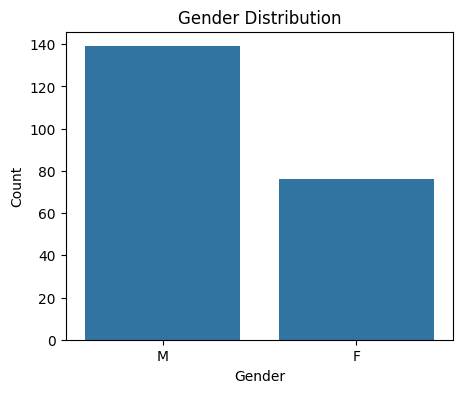

In [ ]:
#Gender in barplot
plt.figure(figsize=(5,4))
sns.countplot(data=job_df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

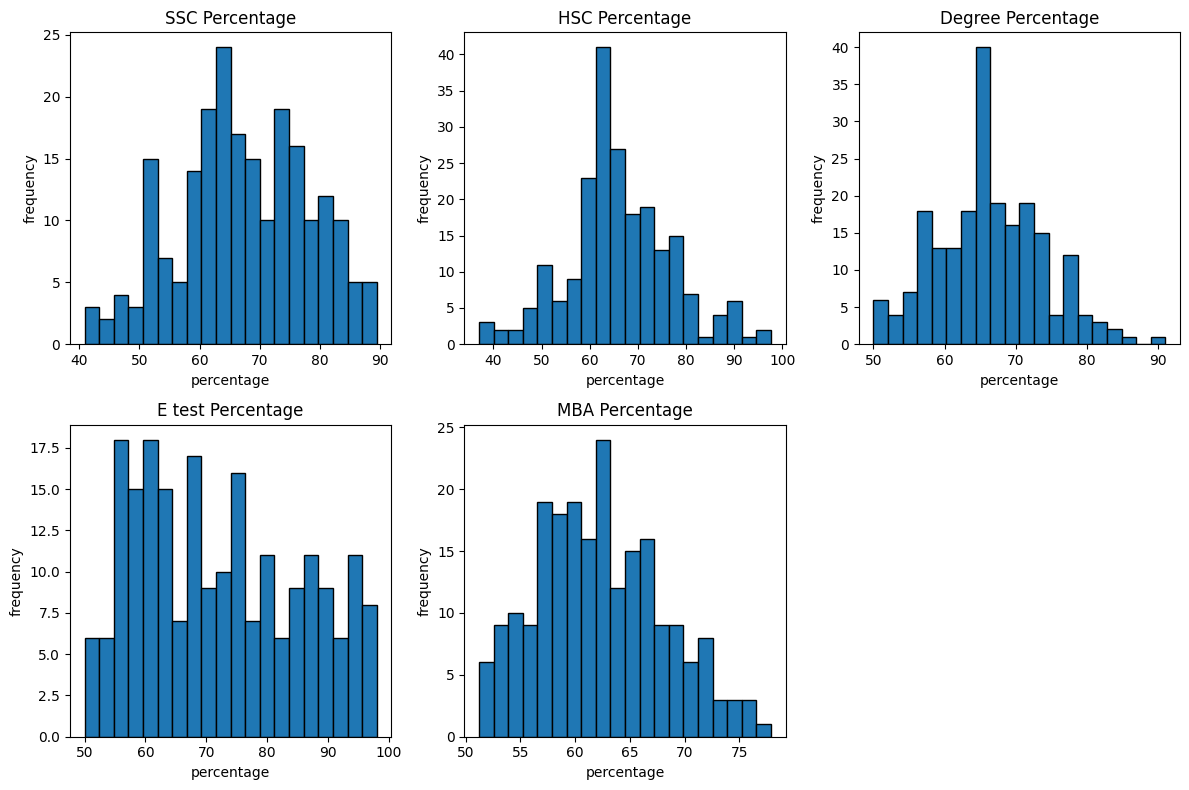

In [ ]:
import matplotlib.pyplot as plt

# Histogram for numerical variables
plt.figure(figsize=(12, 8))
#histogram for SSC Percentage
plt.subplot(2, 3, 1)
plt.hist(data=job_df, x='ssc_p', bins=20, edgecolor = 'black')
plt.title('SSC Percentage')
plt.xlabel('percentage')
plt.ylabel('frequency')
#histogram for HSC Percentage
plt.subplot(2, 3, 2)
plt.hist(data=job_df, x='hsc_p', bins=20, edgecolor = 'black')
plt.title('HSC Percentage')
plt.xlabel('percentage')
plt.ylabel('frequency')
#histogram for Degree Percentage
plt.subplot(2, 3, 3)
plt.hist(data=job_df, x='degree_p', bins=20, edgecolor = 'black')
plt.title('Degree Percentage')
plt.xlabel('percentage')
plt.ylabel('frequency')
#histogram for E test Percentage
plt.subplot(2, 3, 4)
plt.hist(data=job_df, x='etest_p', bins=20, edgecolor = 'black')
plt.title('E test Percentage')
plt.xlabel('percentage')
plt.ylabel('frequency')
#histogram for MBA Percentage
plt.subplot(2, 3, 5)
plt.hist(data=job_df, x='mba_p', bins=20, edgecolor = 'black')
plt.title('MBA Percentage')
plt.xlabel('percentage')
plt.ylabel('frequency')

plt.tight_layout()
plt.show()


**Bivariate Visualization**

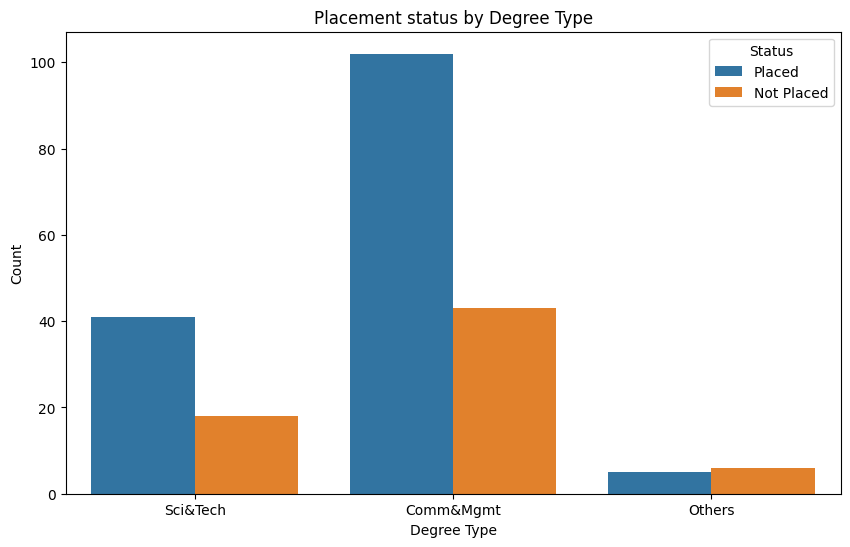

In [ ]:
#Barchart for job placement according to degree type
plt.figure(figsize = (10,6))
sns.countplot(data=job_df, x='degree_t', hue='status')
plt.title('Placement status by Degree Type')
plt.xlabel('Degree Type')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

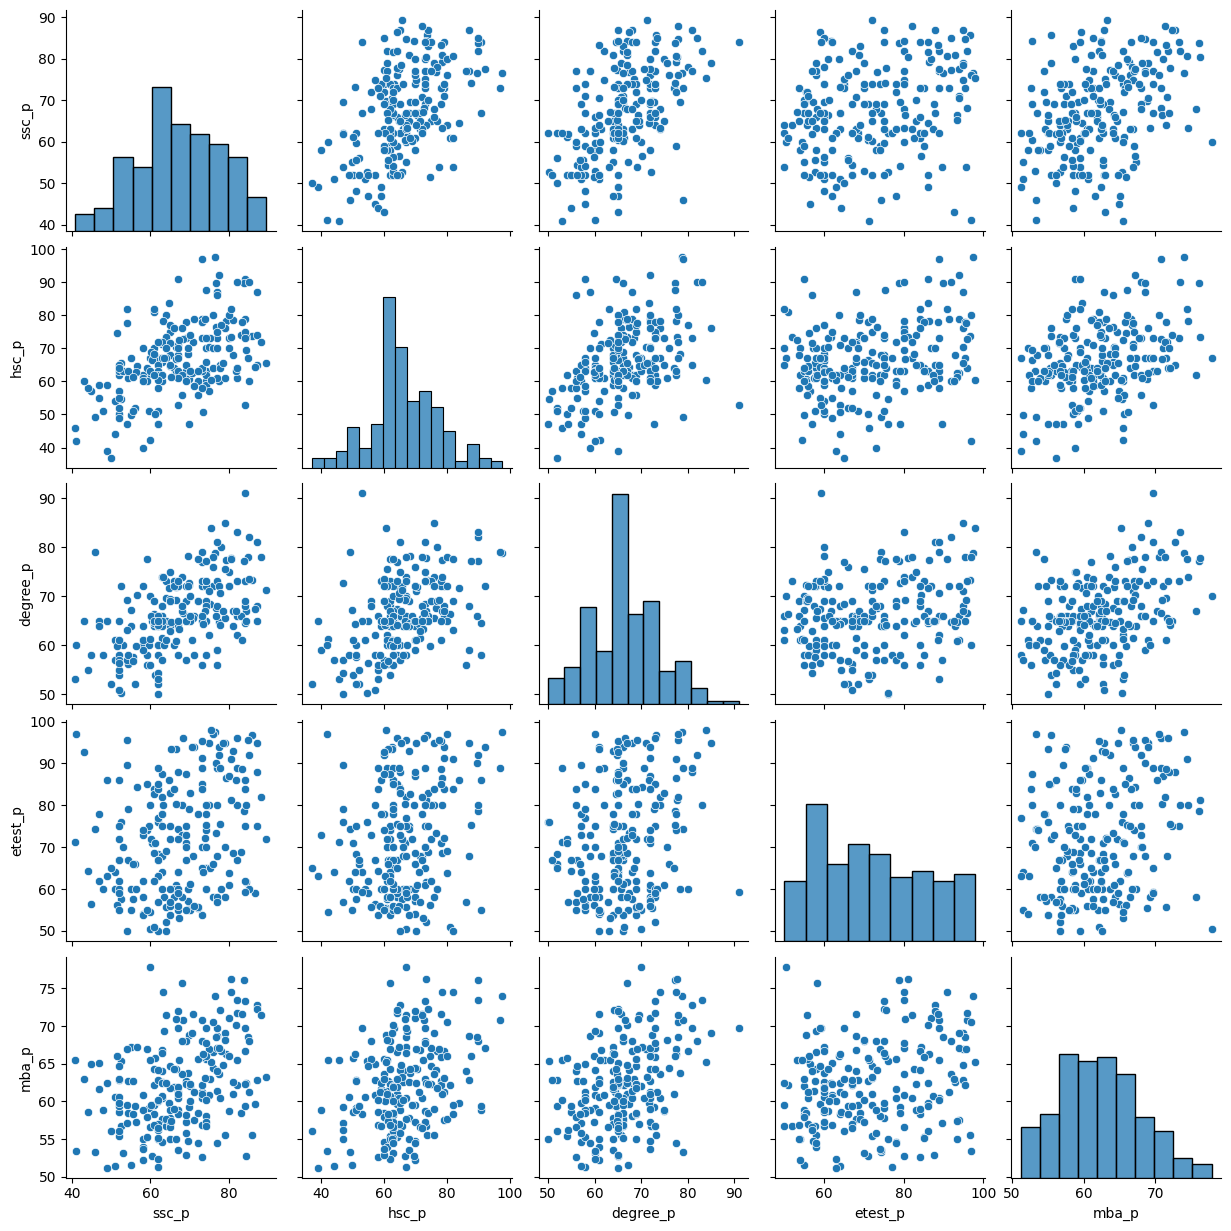

In [ ]:
#Pairplot
numerical_variables = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
sns.pairplot(job_df[numerical_variables])
plt.show()

In [ ]:
job_df.select_dtypes(include=['number']).corr()


,ssc_p,hsc_p,degree_p,etest_p,mba_p
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000


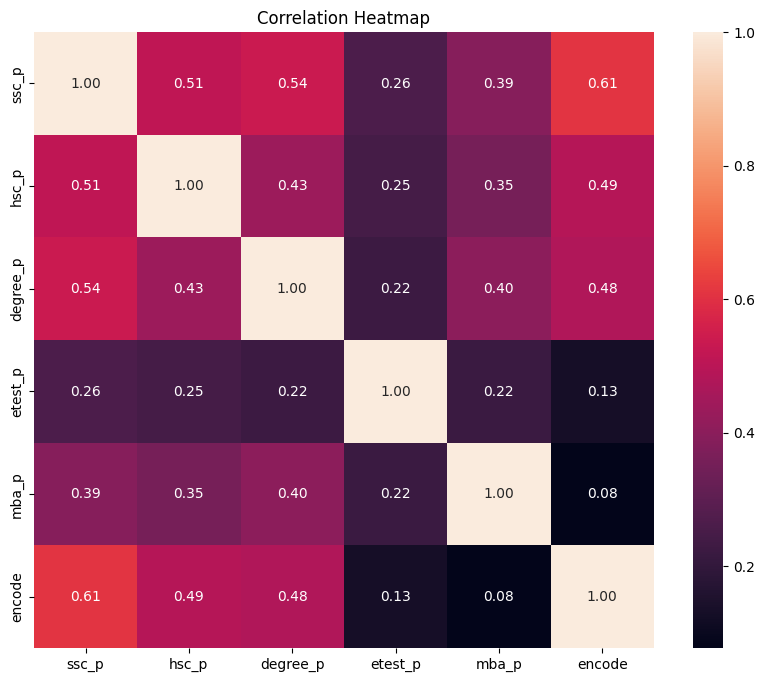

In [ ]:
#Heatmap
encode = job_df['status'].map({'Placed':1, 'Not Placed':0})

variables = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
#Creating new dataframe and copying variables into new
statusdata = job_df[variables].copy()
statusdata['encode'] = encode #Adding encode column in new dataframe

correlation = statusdata.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**One Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Specifying categorical columns
categorical = ['gender', 'degree_t', 'workex', 'status']
#Performing one hot encoding on specified categorical columns
job_df = pd.get_dummies(job_df, columns = categorical, drop_first = True)
job_df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,degree_t_Others,degree_t_Sci&Tech,workex_Yes,status_Placed
0,67.00,91.00,58.00,55.0,58.80,True,False,True,False,True
1,79.33,78.33,77.48,86.5,66.28,True,False,True,True,True
2,65.00,68.00,64.00,75.0,57.80,True,False,False,False,True
3,56.00,52.00,52.00,66.0,59.43,True,False,True,False,False
4,85.80,73.60,73.30,96.8,55.50,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,True,False,False,False,True
211,58.00,60.00,72.00,74.0,53.62,True,False,True,False,True
212,67.00,67.00,73.00,59.0,69.72,True,False,False,True,True
213,74.00,66.00,58.00,70.0,60.23,False,False,False,False,True


# Scratch

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])
#Importing library for splitting data
from sklearn.model_selection import train_test_split,GridSearchCV

#Splitting data into training and testing sets
X = job_df.drop(columns=['status_Placed']) #Fearure variables
y = job_df['status_Placed'] #Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Sigmoid activation function - Ensure z is a NumPy array"""
        z = np.array(z, dtype=np.float64)  #  Convert to NumPy array
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Train the logistic regression model using gradient descent"""
        X = np.array(X, dtype=np.float64)  # Ensure X is a NumPy array
        y = np.array(y, dtype=np.float64)  #  Ensure y is a NumPy array
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """Predict class labels (0 or 1)"""
        X = np.array(X, dtype=np.float64)  #  Ensure X is a NumPy array
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)  # Convert probabilities to class labels

#  Convert data to numpy arrays for processing
X_train_np, X_test_np = np.array(X_train, dtype=np.float64), np.array(X_test, dtype=np.float64)
y_train_np, y_test_np = np.array(y_train, dtype=np.float64), np.array(y_test, dtype=np.float64)

#  Train logistic regression model
model = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train_np, y_train_np)

#  Make predictions
y_train_pred = model.predict(X_train_np)
y_test_pred = model.predict(X_test_np)

# Evaluate performance using accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    "Train Accuracy": accuracy_score(y_train_np, y_train_pred),
    "Test Accuracy": accuracy_score(y_test_np, y_test_pred),
    "Train Precision": precision_score(y_train_np, y_train_pred, zero_division=1),
    "Test Precision": precision_score(y_test_np, y_test_pred, zero_division=1),
    "Train Recall": recall_score(y_train_np, y_train_pred),
    "Test Recall": recall_score(y_test_np, y_test_pred),
    "Train F1-score": f1_score(y_train_np, y_train_pred),
    "Test F1-score": f1_score(y_test_np, y_test_pred),
}

print(metrics)


{'Train Accuracy': 0.8372093023255814, 'Test Accuracy': 0.8604651162790697, 'Train Precision': 0.8617886178861789, 'Test Precision': 0.8571428571428571, 'Train Recall': 0.905982905982906, 'Test Recall': 0.967741935483871, 'Train F1-score': 0.8833333333333333, 'Test F1-score': 0.9090909090909091}


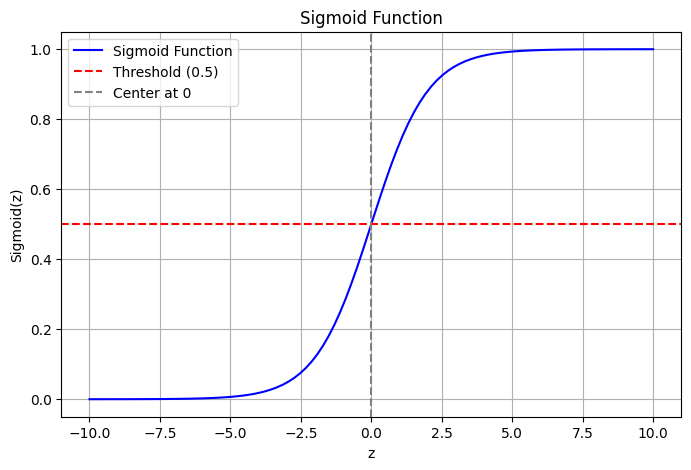

In [224]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for z
z = np.linspace(-10, 10, 100)

# Compute sigmoid values
sigmoid_values = sigmoid(z)

# Plot the sigmoid function
plt.figure(figsize=(8, 5))
plt.plot(z, sigmoid_values, label="Sigmoid Function", color="blue")
plt.axhline(y=0.5, color='red', linestyle='--', label="Threshold (0.5)")
plt.axvline(x=0, color='gray', linestyle='--', label="Center at 0")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function")
plt.legend()
plt.grid()
plt.show()

**Building Models**

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Creating a random forest classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train) #Training rf model

#Making predictions on test set
ypred_rf = rf_model.predict(X_test) #Prediction

#Calculating sccuracy of the model
rf_accuracy = accuracy_score(y_test, ypred_rf)
print(f"rf_accuracy: {rf_accuracy}")

rf_accuracy: 0.7674418604651163


In [226]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

#Creating gradient boosting classifier model
gr_model = GradientBoostingClassifier()
gr_model.fit(X_train, y_train) #Training the gr model

ypred_gr = gr_model.predict(X_test) #Prediction on test set

#Calculating the accuracy of the model
gr_accuracy = accuracy_score(y_test, ypred_gr)
print(f"gr_accuracy: {gr_accuracy}")

gr_accuracy: 0.813953488372093


In [227]:
#Defining parameter grid for Random forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#Performing grid search with cross validation
grid_search_rf = GridSearchCV(rf_model,param_grid_rf , cv=4)
grid_search_rf.fit(X_train, y_train)

#Getting best parameters found by grid search
best_params = grid_search_rf.best_params_
print('Best Parameters:\n',best_params)

#Getting best rf model
best_rf_model = grid_search_rf.best_estimator_
new_y_pred = best_rf_model.predict(X_test) #Making predictios using the best model

#Calculating the accuracy of the model
accuracy = accuracy_score(y_test,new_y_pred)
print('Accuracy is: ',accuracy)

Best Parameters:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy is:  0.7674418604651163


In [ ]:
#Defining parameter grid for gradient boosting
param_grid_gr = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Performing grid search with cross validation
grid_search_gr = GridSearchCV(gr_model,param_grid_gr , cv=4)
grid_search_gr.fit(X_train, y_train)

#Getting best parameters found by grid search
best_params = grid_search_gr.best_params_
print('Best Parameters:\n',best_params)

#Getting best gr model
best_gr_model = grid_search_gr.best_estimator_
#Making predictions using best model
new_y_pred = best_gr_model.predict(X_test)

#Calculating accuracy of the model
accuracy = accuracy_score(y_test,new_y_pred)
print('Accuracy is: ',accuracy)

Best Parameters:
 {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy is:  0.813953488372093


#Feature slection and Final model

In [ ]:
#Initializing best rf with best hyperparameters
best_randomForest = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100)

#Initializing rfe with best rf model
rfe = RFE(estimator = best_randomForest, n_features_to_select=5)

#Fitting rfe to training data
rfe.fit(X_train,y_train)
#Getting selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features: ",selected_features)

#Final model, fitting rf model with selected features
best_randomForest.fit(X_train[selected_features],y_train)
#Making predictiona dn evaluating themodel
y_pred = best_randomForest.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Feature selection for Random Forest: ",accuracy)

Selected Features:  Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')
Accuracy with Feature selection for Random Forest:  0.7906976744186046


In [ ]:
#Initializing best rf with best hyperparameters
best_gradientboosting = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50)
#Initializing rfe with best gf model
rfe = RFE(estimator = best_gradientboosting, n_features_to_select=5)
#Fitting rfe on training data
rfe.fit(X_train,y_train)

#Getting selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features: ", selected_features)

#Final Model, fitting gr model with selected features
best_gradientboosting.fit(X_train[selected_features],y_train)
#Making predictions evaluating the model
y_pred = best_gradientboosting.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Feature selection for Gradient Boosting: ",accuracy)

Selected Features:  Index(['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'workex_Yes'], dtype='object')
Accuracy with Feature selection for Gradient Boosting:  0.7906976744186046


**Conclusion**

# After hyperparameter tuning, the Random Forest Classifier achieved 76.74% accuracy, and the Gradient Boosting Classifier reached 79.07%. After applying RFE (feature selection), the Random Forest accuracy increased to 79.07%, while Gradient Boosting remained the same.

GridSearchCV was used for the hyperparameter tuning of both models. After hyperparameter tuning, the accuracy of random forest classifier was 0.7674418604651163 and the accuracy of gradient boosting classifier was 0.7906976744186046. After using the feature selection method RFE and rebuilding the model, there was increase in the accuracy of random forest classifier 0.7906976744186046 and the accuracy of gradient boosting classifier was same as before.

Cross-validation and feature selection methods which were applied in the models increased the random forest classifier's accuracy and the gradient boosting classifier's accuracy was same as before. For the future direction, it is essential to look uo to the relation between the feature variables and target variables for the better model performance.

